In [1]:
# Importing the required packages
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams['figure.figsize'] = [30,15]
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

In [2]:
# Importing the dataset
names = ['Pregnant','Plasma glucose','blood pressure' ,'Triceps','serum insulin','BMI','Diabetes pedigree function','Age (years)','Class']
df = pd.read_csv("pima-indians-diabetes.csv", names=names, index_col=False)
df.head()

,Pregnant,Plasma glucose,blood pressure,Triceps,serum insulin,BMI,Diabetes pedigree function,Age (years),Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Selecting the columns required and splitting into feature columns & target column
model_names = ['Pregnant','Plasma glucose','blood pressure' ,'Triceps','serum insulin','BMI','Diabetes pedigree function','Age (years)']
X = df[model_names]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print('Accuracy: {:.2f}'.format(gbc.score(X_test, y_test)))

Accuracy: 0.82


In [5]:
# Example of the output using input
gbc.predict([[5,150, 66, 0,0,33.6,0.165,40]])

/Users/prabhatm/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1])

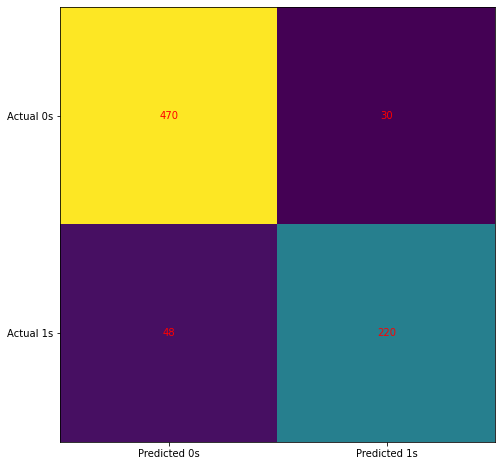

In [6]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, gbc.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [7]:
# Displaying the classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       107
           1       0.70      0.70      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154

